In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv(r'D:\Datasets\glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.shape

(214, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
data['Type'] = np.where(data['Type']<3,0,1)
data['Type'].value_counts()

0    146
1     68
Name: Type, dtype: int64

In [7]:
x = data.drop('Type',axis=1)
y = data['Type']

In [8]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x , y = ros.fit_resample(x,y)
print(x.shape,y.shape)

(292, 9) (292,)


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred = knc.predict(x_test)

In [12]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.8767123287671232
[[30  1]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.97      0.81      0.88        42

    accuracy                           0.88        73
   macro avg       0.88      0.89      0.88        73
weighted avg       0.89      0.88      0.88        73



In [13]:
x_pred = knc.predict(x_train)

In [14]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,x_pred))
print(metrics.confusion_matrix(y_train,x_pred))
print(metrics.classification_report(y_train,x_pred))

0.9178082191780822
[[104  11]
 [  7  97]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       115
           1       0.90      0.93      0.92       104

    accuracy                           0.92       219
   macro avg       0.92      0.92      0.92       219
weighted avg       0.92      0.92      0.92       219



# HYPERPARAMETER EXPERIMENTATION


## n_neighbors

In [15]:
knc1 = KNeighborsClassifier(n_neighbors = 10)
knc1.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
y_pre = knc1.predict(x_test)

In [17]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pre))
print(metrics.confusion_matrix(y_test,y_pre))
print(metrics.classification_report(y_test,y_pre))

0.821917808219178
[[30  1]
 [12 30]]
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        31
           1       0.97      0.71      0.82        42

    accuracy                           0.82        73
   macro avg       0.84      0.84      0.82        73
weighted avg       0.86      0.82      0.82        73



We can find value of k using either elbow method or by using hyperparameter tuning

So first let's try with elbow method

### Elbow Method to find value of K

In [18]:
err_rate = []
for i in range (1,50,5):
    knc1 = KNeighborsClassifier(n_neighbors = i)
    knc1.fit(x_train,y_train)
    pred_i = knc1.predict(x_test)
    err_rate.append(np.mean(pred_i != y_test))
print(err_rate)

[0.0547945205479452, 0.2054794520547945, 0.1780821917808219, 0.2054794520547945, 0.2054794520547945, 0.2328767123287671, 0.2328767123287671, 0.2328767123287671, 0.2328767123287671, 0.2465753424657534]


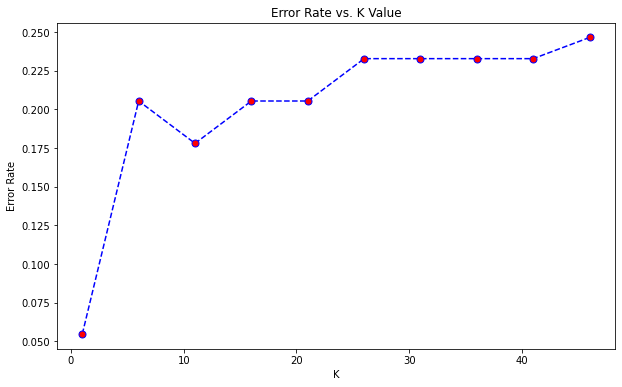

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50,5),err_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [20]:
knc1 = KNeighborsClassifier(n_neighbors = 11)
knc1.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=27)

In [21]:
y_pre = knc1.predict(x_test)
print(metrics.accuracy_score(y_test,y_pre))
print(metrics.confusion_matrix(y_test,y_pre))
print(metrics.classification_report(y_test,y_pre))

0.7671232876712328
[[30  1]
 [16 26]]
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        31
           1       0.96      0.62      0.75        42

    accuracy                           0.77        73
   macro avg       0.81      0.79      0.77        73
weighted avg       0.83      0.77      0.76        73



In [22]:
x_pre = knc1.predict(x_train)
print(metrics.accuracy_score(y_train,x_pre))
print(metrics.confusion_matrix(y_train,x_pre))
print(metrics.classification_report(y_train,x_pre))

0.8082191780821918
[[103  12]
 [ 30  74]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       115
           1       0.86      0.71      0.78       104

    accuracy                           0.81       219
   macro avg       0.82      0.80      0.80       219
weighted avg       0.82      0.81      0.81       219



In [23]:
knc3 = KNeighborsClassifier(n_neighbors = 36)
knc3.fit(x_train , y_train)
y_pre = knc3.predict(x_test)
print("Testing Accuracy")
print(metrics.accuracy_score(y_test,y_pre))
print(metrics.confusion_matrix(y_test,y_pre))
print(metrics.classification_report(y_test,y_pre))
print("Training Accuracy")
x_pre = knc3.predict(x_train)
print(metrics.accuracy_score(y_train,x_pre))
print(metrics.confusion_matrix(y_train,x_pre))
print(metrics.classification_report(y_train,x_pre))

Testing Accuracy
0.7671232876712328
[[30  1]
 [16 26]]
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        31
           1       0.96      0.62      0.75        42

    accuracy                           0.77        73
   macro avg       0.81      0.79      0.77        73
weighted avg       0.83      0.77      0.76        73

Training Accuracy
0.8036529680365296
[[103  12]
 [ 31  73]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       115
           1       0.86      0.70      0.77       104

    accuracy                           0.80       219
   macro avg       0.81      0.80      0.80       219
weighted avg       0.81      0.80      0.80       219



In [24]:
# k =42

In [25]:
knc41 = KNeighborsClassifier(n_neighbors = 42)
knc41.fit(x_train , y_train)
y_pre = knc41.predict(x_test)
print("Testing Accuracy")
print(metrics.accuracy_score(y_test,y_pre))
print(metrics.confusion_matrix(y_test,y_pre))
print(metrics.classification_report(y_test,y_pre))
print("Training Accuracy")
x_pre = knc41.predict(x_train)
print(metrics.accuracy_score(y_train,x_pre))
print(metrics.confusion_matrix(y_train,x_pre))
print(metrics.classification_report(y_train,x_pre))

Testing Accuracy
0.7534246575342466
[[30  1]
 [17 25]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77        31
           1       0.96      0.60      0.74        42

    accuracy                           0.75        73
   macro avg       0.80      0.78      0.75        73
weighted avg       0.82      0.75      0.75        73

Training Accuracy
0.8036529680365296
[[104  11]
 [ 32  72]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       115
           1       0.87      0.69      0.77       104

    accuracy                           0.80       219
   macro avg       0.82      0.80      0.80       219
weighted avg       0.81      0.80      0.80       219



## algorithm and leaf_size

In [26]:
knc42 = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size=50)
knc42.fit(x_train , y_train)
y_pre = knc42.predict(x_test)
print("Testing Accuracy")
print(metrics.accuracy_score(y_test,y_pre))
print(metrics.confusion_matrix(y_test,y_pre))
print(metrics.classification_report(y_test,y_pre))
print("Training Accuracy")
x_pre = knc42.predict(x_train)
print(metrics.accuracy_score(y_train,x_pre))
print(metrics.confusion_matrix(y_train,x_pre))
print(metrics.classification_report(y_train,x_pre))

Testing Accuracy
0.8767123287671232
[[30  1]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.97      0.81      0.88        42

    accuracy                           0.88        73
   macro avg       0.88      0.89      0.88        73
weighted avg       0.89      0.88      0.88        73

Training Accuracy
0.9178082191780822
[[104  11]
 [  7  97]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       115
           1       0.90      0.93      0.92       104

    accuracy                           0.92       219
   macro avg       0.92      0.92      0.92       219
weighted avg       0.92      0.92      0.92       219



In [27]:
knc5 = KNeighborsClassifier(algorithm = 'kd_tree')
knc5.fit(x_train , y_train)
y_predd = knc5.predict(x_test)
print("Testing Accuracy")
print(metrics.accuracy_score(y_test,y_predd))
print(metrics.confusion_matrix(y_test,y_predd))
print(metrics.classification_report(y_test,y_predd))
print("Training Accuracy")
x_predd= knc5.predict(x_train)
print(metrics.accuracy_score(y_train,x_predd))
print(metrics.confusion_matrix(y_train,x_predd))
print(metrics.classification_report(y_train,x_predd))

Testing Accuracy
0.8767123287671232
[[30  1]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.97      0.81      0.88        42

    accuracy                           0.88        73
   macro avg       0.88      0.89      0.88        73
weighted avg       0.89      0.88      0.88        73

Training Accuracy
0.9178082191780822
[[104  11]
 [  7  97]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       115
           1       0.90      0.93      0.92       104

    accuracy                           0.92       219
   macro avg       0.92      0.92      0.92       219
weighted avg       0.92      0.92      0.92       219



In [28]:
knc5 = KNeighborsClassifier(algorithm = 'ball_tree')
knc5.fit(x_train , y_train)
y_pred = knc5.predict(x_test)
print("Testing Accuracy")
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
print("Training Accuracy")
x_pred= knc5.predict(x_train)
print(metrics.accuracy_score(y_train,x_pred))
print(metrics.confusion_matrix(y_train,x_pred))
print(metrics.classification_report(y_train,x_pred))

Testing Accuracy
0.8767123287671232
[[30  1]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.97      0.81      0.88        42

    accuracy                           0.88        73
   macro avg       0.88      0.89      0.88        73
weighted avg       0.89      0.88      0.88        73

Training Accuracy
0.9178082191780822
[[104  11]
 [  7  97]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       115
           1       0.90      0.93      0.92       104

    accuracy                           0.92       219
   macro avg       0.92      0.92      0.92       219
weighted avg       0.92      0.92      0.92       219



## weights

In [29]:
knc23 = KNeighborsClassifier(weights = "distance")
knc23.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [30]:
y_pr = knc23.predict(x_test)
print(metrics.accuracy_score(y_test,y_pr))
print(metrics.confusion_matrix(y_test,y_pr))
print(metrics.classification_report(y_test,y_pr))

0.9863013698630136
[[31  0]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.98      0.99        42

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



In [31]:
x_pr = knc23.predict(x_train)
print(metrics.accuracy_score(y_train,x_pr))
print(metrics.confusion_matrix(y_train,x_pr))
print(metrics.classification_report(y_train,x_pr))

1.0
[[115   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       104

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



## p

In [32]:
knc45 = KNeighborsClassifier(p = 1)
knc45.fit(x_train , y_train)

KNeighborsClassifier(p=1)

In [33]:
y_p = knc.predict(x_test)
print(metrics.accuracy_score(y_test,y_p))
print(metrics.confusion_matrix(y_test,y_p))
print(metrics.classification_report(y_test,y_p))

0.8767123287671232
[[30  1]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.97      0.81      0.88        42

    accuracy                           0.88        73
   macro avg       0.88      0.89      0.88        73
weighted avg       0.89      0.88      0.88        73



In [34]:
x_p = knc45.predict(x_train)
print(metrics.accuracy_score(y_train,x_p))
print(metrics.confusion_matrix(y_train,x_p))
print(metrics.classification_report(y_train,x_p))

0.9223744292237442
[[102  13]
 [  4 100]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       115
           1       0.88      0.96      0.92       104

    accuracy                           0.92       219
   macro avg       0.92      0.92      0.92       219
weighted avg       0.93      0.92      0.92       219



# IMPORTANT HYPERPARAMETERS OF KNN

## 1 - n_neighbors

## 2 - weights

## 3 - leaf_size

## 4 - p

## 5 - algorithm


Now lets do hyperparameter tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_neighbors' : [10,11,12,13,14,15],
    'weights'     : ['uniform','distance'],
    'algorithm'   : ['auto','brute_force','ball_tree','kd_tree'],
    'leaf_size'   : [i for i in range(10,20,1)],
    'p'           : [1,2]
}
params

{'n_neighbors': [10, 11, 12, 13, 14, 15],
 'weights': ['uniform', 'distance'],
 'algorithm': ['auto', 'brute_force', 'ball_tree', 'kd_tree'],
 'leaf_size': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'p': [1, 2]}

In [52]:
knc = KNeighborsClassifier()
rnd_knc = RandomizedSearchCV(estimator = knc , param_distributions=params , n_iter = 50 , cv = 3 , n_jobs = -1)
rnd_knc.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'brute_force',
                                                      'ball_tree', 'kd_tree'],
                                        'leaf_size': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_neighbors': [10, 11, 12, 13, 14, 15],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [53]:
a = rnd_knc.best_estimator_
a

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12,
                     weights='distance')

In [54]:
a.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12,
                     weights='distance')

In [55]:
y_predict = a.predict(x_test)

In [56]:
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))

0.9863013698630136
[[31  0]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.98      0.99        42

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



In [57]:
x_predict = a.predict(x_train)

In [58]:
print(metrics.accuracy_score(y_train,x_predict))
print(metrics.confusion_matrix(y_train,x_predict))
print(metrics.classification_report(y_train,x_predict))

1.0
[[115   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       104

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219

